In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import tree

In [2]:
# Load the dataset
df = pd.read_csv('credit.csv')

In [3]:
# Print column names to identify the target column
print(df.columns)

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')


In [4]:
# Assuming the target column is identified, replace 'target_column_name' with the actual name
target_column_name = 'default'  # Update this after identifying the correct column name

In [5]:
# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())

  checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67     

In [6]:
# Handle missing values (if any)
df = df.dropna()

In [7]:
# Encode non-numeric values using Label Encoding or One-Hot Encoding
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [8]:

# Now, split the data into features (X) and target (y)
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# If the target column is also categorical, encode it
if df[target_column_name].dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)


In [9]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65, stratify=y)


In [10]:

# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


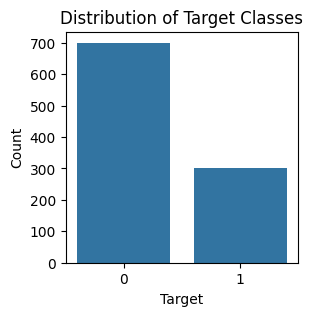

In [11]:

# Visualize the distribution of target classes
plt.figure(figsize=(3, 3))
sns.countplot(x=df[target_column_name])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.show()


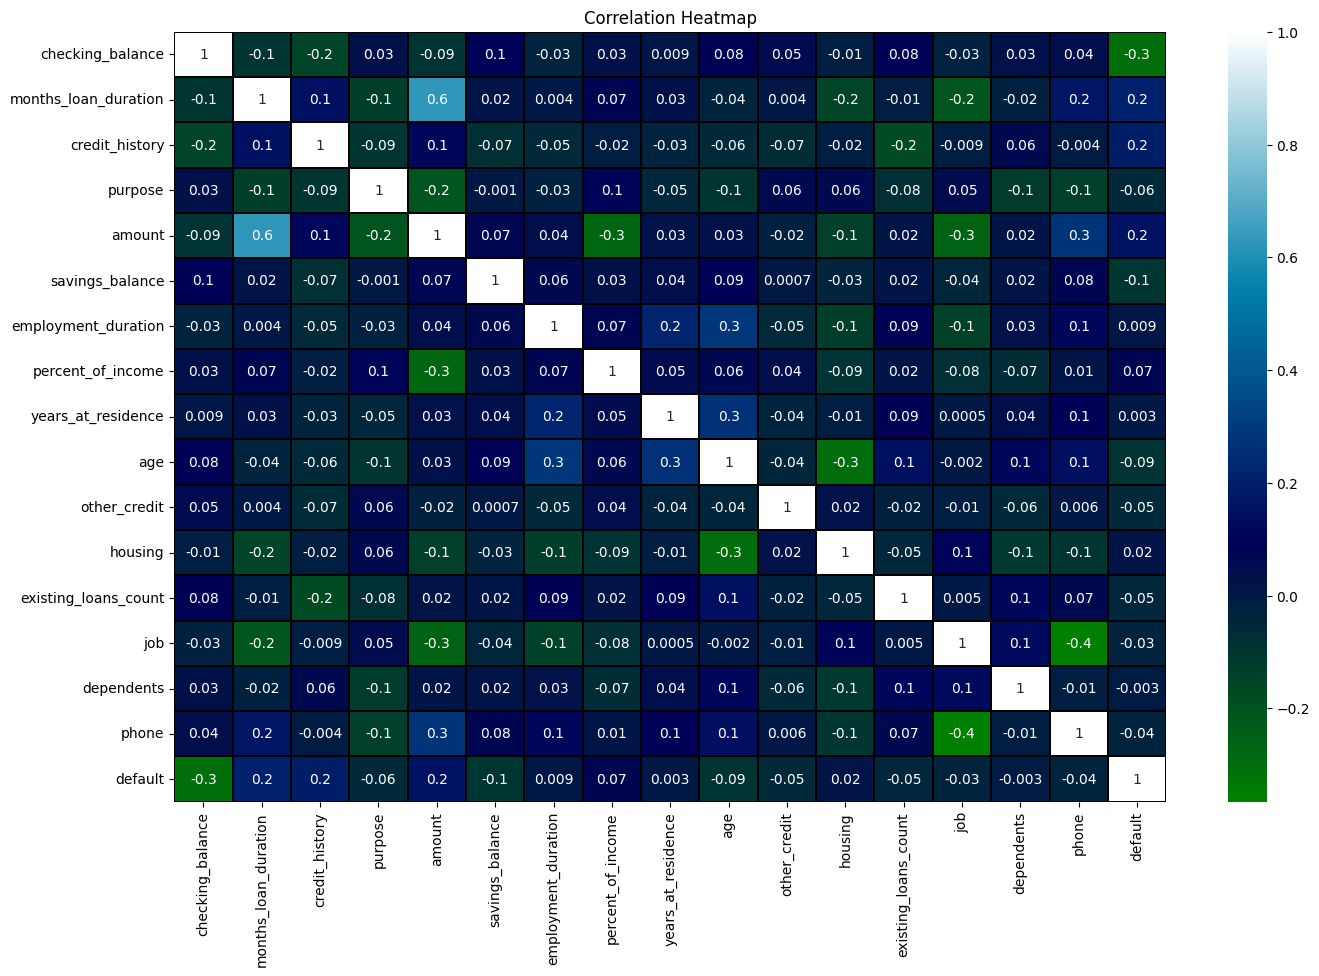

In [12]:

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='ocean', linecolor='black', linewidths=0.2, fmt='.1g', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


In [13]:

# Train a Decision Tree classifier
model = DecisionTreeClassifier(random_state=54)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=54)

In [14]:

# Make predictions
y_pred = model.predict(X_test)


In [15]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.71


In [16]:

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)


Confusion Matrix:
[[115  25]
 [ 33  27]]


         Predict1  Predict0
Actual1       115        25
Actual0        33        27


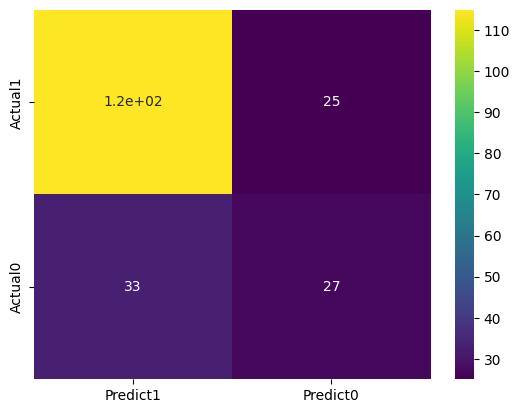

In [17]:

# Confusion Matrix display
cm_df = pd.DataFrame(confusion, index=['Actual1', 'Actual0'], columns=['Predict1', 'Predict0'])
print(cm_df)
sns.heatmap(cm_df, annot=True, cmap='viridis')
plt.show()


In [18]:

# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       140
           1       0.52      0.45      0.48        60

    accuracy                           0.71       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.70      0.71      0.70       200



In [22]:

# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)


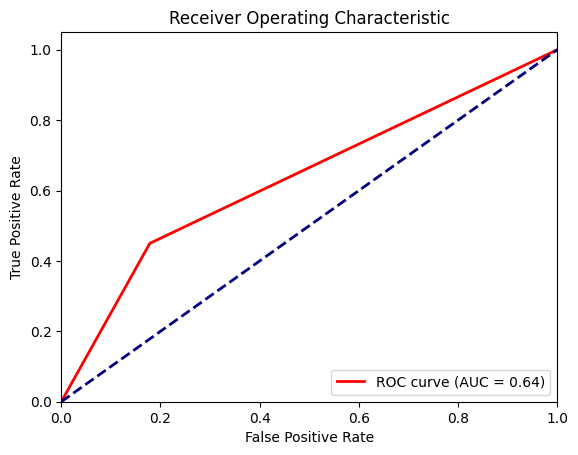

In [20]:

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


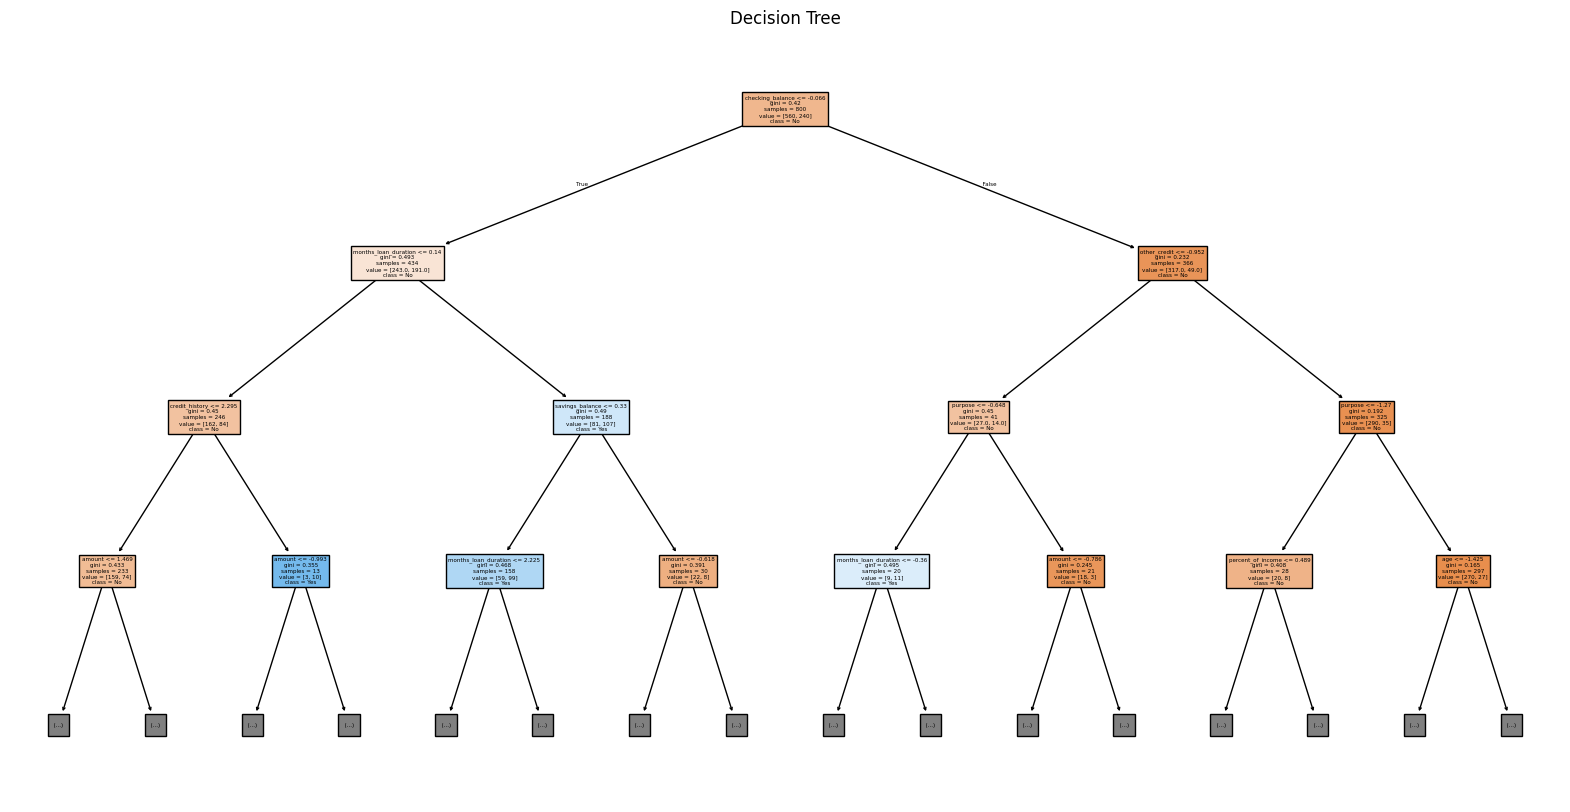

In [21]:

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'],max_depth=3)
plt.title('Decision Tree')
plt.show()